In [3]:
import numpy as np
import pandas as pd

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data.sampler import SubsetRandomSampler

import matplotlib.pyplot as plt
import time
import copy
from random import shuffle

import tqdm.notebook as tqdm

import sklearn
from sklearn.metrics import accuracy_score, cohen_kappa_score
from sklearn.metrics import classification_report
from PIL import Image
import cv2

import os
import shutil

from dataset_utils import *
from model_utils import *

import warnings
warnings.filterwarnings('ignore')

In [4]:
COVID_PATH = './COVID19-DATASET/train/covid19'
NORMAL_PATH = './COVID19-DATASET/train/normal'
DATA_PATH = './COVID19-DATASET/train'

## Dataset Checking

### Dataset Distribution 

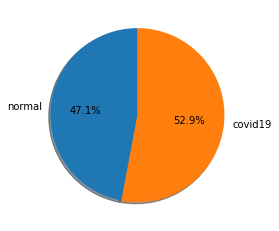

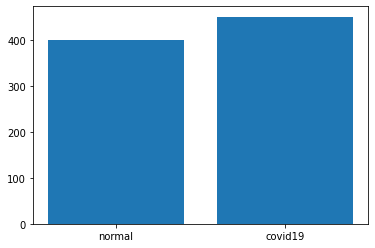

In [5]:
class_names = os.listdir(DATA_PATH)
image_count = {}
for i in class_names:
    image_count[i] = len(os.listdir(os.path.join(DATA_PATH,i)))

#Plotting Distribution of Each Classes
fig1, ax1 = plt.subplots()
ax1.pie(image_count.values(),
        labels = image_count.keys(),
        shadow=True,
        autopct = '%1.1f%%',
        startangle=90)
plt.show()

names = list(image_count.keys())
values = list(image_count.values())
plt.bar(range(len(image_count)), values, tick_label=names)
plt.show()

### Plot Samples

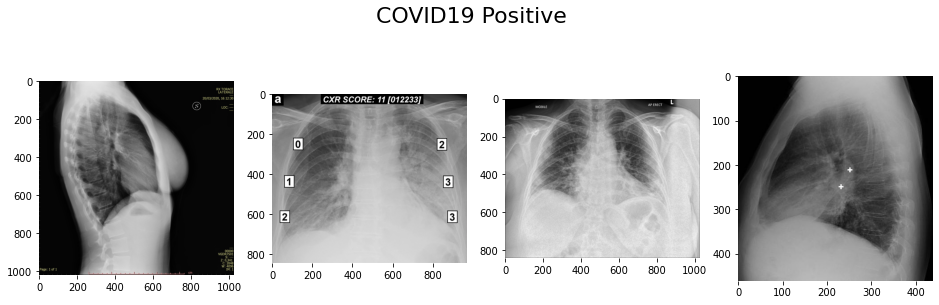

In [6]:
smaple_ploter(COVID_PATH, "COVID19 Positive")

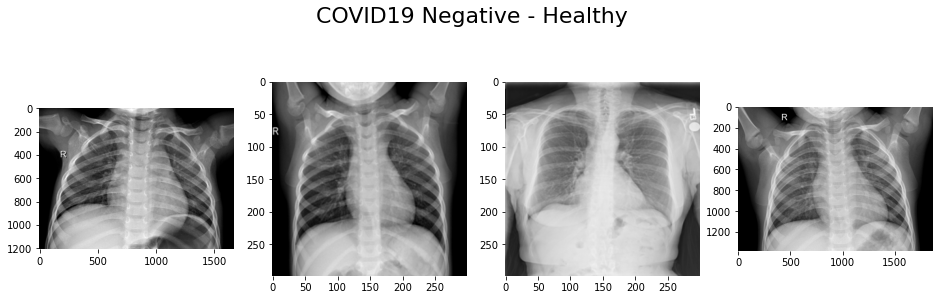

In [7]:
smaple_ploter(NORMAL_PATH, "COVID19 Negative - Healthy")

## Train and Test split

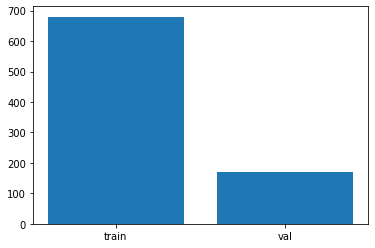

In [8]:
trainloader, valloader, dataset_size = load_split_train_test(DATA_PATH, .2)
dataloaders = {"train":trainloader, "val":valloader}
data_sizes = {x: len(dataloaders[x].sampler) for x in ['train','val']}
class_names = trainloader.dataset.classes
names = list(data_sizes.keys())
values = list(data_sizes.values())
plt.bar(range(len(data_sizes)), values, tick_label=names)
plt.show()

## Chose Device To Train

In [13]:
if torch.cuda.is_available():
    device=torch.device("cuda:0")
    print("Training on GPU... ")
else:
    device = torch.device("cpu")
    print("Training on CPU... ")

Training on GPU... 


In [10]:
torch.cuda.empty_cache()

## Model Definition
 

* pre-trained DenseNet-121 is used as the core here for our Deep Learning Model (More details here in this [paper](https://arxiv.org/abs/1608.06993)).

* Instead of freezing CNN Layers and training only the Fully Connected Layer we traning all the the Layers (CNNs and Classification)

![DenseNet-121](https://miro.medium.com/max/1400/1*vIZhPImFr9Gjpx6ZB7IOJg.png)



In [11]:
def CNN_Model(pretrained=True):
    model = models.densenet121(pretrained=pretrained) 
    num_ftrs = model.classifier.in_features 
    model.classifier = nn.Linear(num_ftrs, len(class_names))
    model = model.to(device) 
    return model


In [12]:
model = CNN_Model(pretrained=True)
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(model.parameters(), lr=0.005)
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.8) 

In [14]:
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Number of trainable parameters: \n{}".format(pytorch_total_params))

Number of trainable parameters: 
6955906


## Train Model

In [ ]:
base_model = train_validate_model(model, criterion, optimizer, exp_lr_scheduler, dataloaders, data_sizes, device, num_epochs=10)
    

Epoch 1/10


train:   0%|          | 0/85 [00:00<?, ?it/s]

train Loss: 0.6569 | train Accuracy: 0.7368


val:   0%|          | 0/22 [00:00<?, ?it/s]

val Loss: 0.4178 | val Accuracy: 0.8000
Epoch 2/10


train:   0%|          | 0/85 [00:00<?, ?it/s]

train Loss: 0.4769 | train Accuracy: 0.7926


val:   0%|          | 0/22 [00:00<?, ?it/s]

val Loss: 0.4175 | val Accuracy: 0.8000
Epoch 3/10


train:   0%|          | 0/85 [00:00<?, ?it/s]

train Loss: 0.4821 | train Accuracy: 0.7868


val:   0%|          | 0/22 [00:00<?, ?it/s]

val Loss: 0.4166 | val Accuracy: 0.8176
Epoch 4/10


train:   0%|          | 0/85 [00:00<?, ?it/s]

train Loss: 0.4860 | train Accuracy: 0.7897


val:   0%|          | 0/22 [00:00<?, ?it/s]

val Loss: 0.4157 | val Accuracy: 0.7941
Epoch 5/10


train:   0%|          | 0/85 [00:00<?, ?it/s]

train Loss: 0.4775 | train Accuracy: 0.7971


val:   0%|          | 0/22 [00:00<?, ?it/s]

val Loss: 0.4200 | val Accuracy: 0.8176
Epoch 6/10


train:   0%|          | 0/85 [00:00<?, ?it/s]

train Loss: 0.4774 | train Accuracy: 0.7882


val:   0%|          | 0/22 [00:00<?, ?it/s]

val Loss: 0.4113 | val Accuracy: 0.8176
Epoch 7/10


train:   0%|          | 0/85 [00:00<?, ?it/s]

train Loss: 0.4876 | train Accuracy: 0.7809


val:   0%|          | 0/22 [00:00<?, ?it/s]

val Loss: 0.4155 | val Accuracy: 0.8000
Epoch 8/10


train:   0%|          | 0/85 [00:00<?, ?it/s]

train Loss: 0.4602 | train Accuracy: 0.8059


val:   0%|          | 0/22 [00:00<?, ?it/s]

val Loss: 0.4161 | val Accuracy: 0.8176
Epoch 9/10


train:   0%|          | 0/85 [00:00<?, ?it/s]

train Loss: 0.4863 | train Accuracy: 0.7750


val:   0%|          | 0/22 [00:00<?, ?it/s]

val Loss: 0.4127 | val Accuracy: 0.8000
Epoch 10/10


train:   0%|          | 0/85 [00:00<?, ?it/s]

train Loss: 0.4857 | train Accuracy: 0.7809


val:   0%|          | 0/22 [00:00<?, ?it/s]

val Loss: 0.4172 | val Accuracy: 0.8176


## Model Evaluation


I take 200 Images from each class for testing from his repository.

In [19]:
TEST_DATA_PATH = './COVID19-DATASET/test/'

test_transforms = transforms.Compose([
                                      transforms.Resize((150,150)),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=mean_nums, std=std_nums)
])


test_image = datasets.ImageFolder(TEST_DATA_PATH, transform=test_transforms)

testloader = torch.utils.data.DataLoader(test_image, batch_size=1)

In [20]:
y_pred_list = []
y_true_list = []
with torch.no_grad():
    for x_batch, y_batch in tqdm.tqdm(testloader, leave=False):
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        y_test_pred = base_model(x_batch)
        y_test_pred = torch.log_softmax(y_test_pred, dim=1)
        _, y_pred_tag = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tag.cpu().numpy())
        y_true_list.append(y_batch.cpu().numpy())

  0%|          | 0/400 [00:00<?, ?it/s]

In [21]:
y_pred_list = [i[0] for i in y_pred_list]
y_true_list = [i[0] for i in y_true_list]

In [22]:
print(classification_report(y_true_list, y_pred_list))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       200
           1       0.94      0.66      0.77       200

    accuracy                           0.81       400
   macro avg       0.84      0.80      0.80       400
weighted avg       0.84      0.81      0.80       400



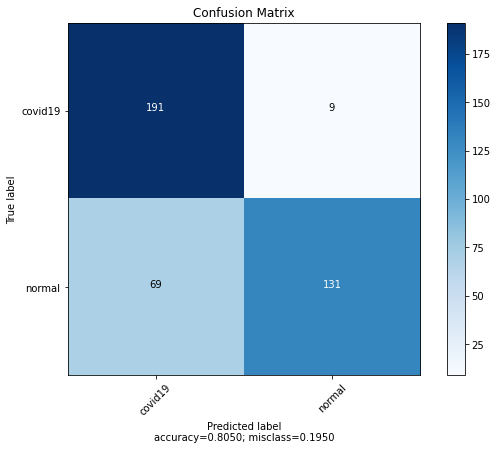

In [23]:
from sklearn.metrics import confusion_matrix

cm =  confusion_matrix(y_true_list, y_pred_list)

plot_confusion_matrix(cm = cm, 
                      normalize    = False,
                      target_names = ['covid19','normal'],
                      title        = "Confusion Matrix")

In [32]:
torch.save(base_model.state_dict(), './best_model.pth')